In [78]:
import tensorflow

In [79]:
import zipfile

zip_path ="C:\\Users\\saran\\Desktop\\ML\\X_ray\\chest_xray-20250726T110654Z-1-001.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Done!")


Done!


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [81]:
# setting the training data directory
datadir=r"dataset/chest_xray/train/"

In [82]:
# initializing the category of classification
categories= ['normal','pneumonia']

In [83]:
! pwd

/c/Users/saran/Desktop/ML/X_ray


In [84]:
! ls

X_ray classification.ipynb
chest_xray-20250726T110654Z-1-001.zip
dataset
model_10.h5


In [85]:
! ls dataset/chest_xray/test

NORMAL
PNEUMONIA


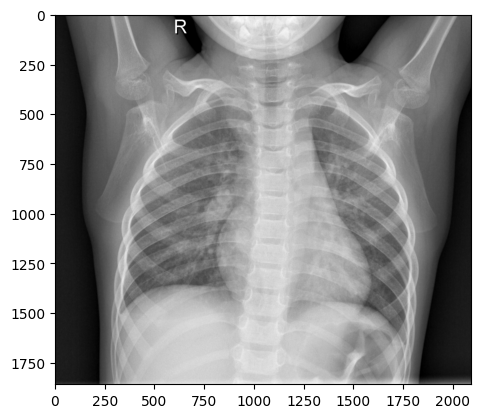

In [86]:
# converting the images to grayscale 
for i in categories: 
    path= os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 
        break 
    break

In [87]:
# initializing the size of the image so that every image should be in same direction
img_size=100

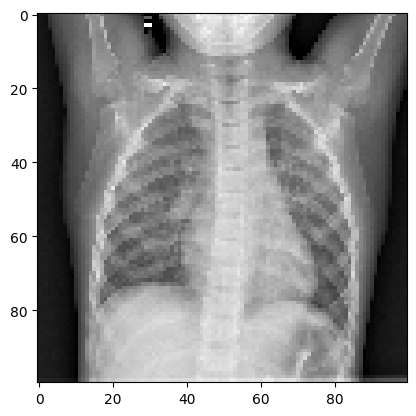

In [88]:
# image after resize and grayscale
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [89]:
training_data=[]

In [90]:
# defining the funstion for training data according to the categories converting he images into gray scale
# converting it into numpy arrays
def create_training_data():
    for i in categories:
        path= os.path.join(datadir,i)
        class_num= categories.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [91]:
create_training_data()

In [92]:
print(len(training_data))

5226


In [93]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[160, 156, 159, ...,  30,  41,  29],
       [157, 154, 161, ...,  38,  24,  31],
       [153, 154, 162, ...,  19,  33,  21],
       ...,
       [168, 184, 183, ..., 100,  64,  39],
       [180, 178, 181, ...,  90,  65,  42],
       [192, 186, 193, ...,  99,  62,  37]], shape=(100, 100), dtype=uint8), 1]
[array([[ 9, 25, 32, ..., 60, 41, 49],
       [ 6, 35, 36, ..., 90, 55, 59],
       [ 6, 41, 39, ..., 63, 77, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(100, 100), dtype=uint8), 1]
[array([[17, 14, 11, ..., 52, 37,  1],
       [14, 11, 50, ..., 54, 47, 27],
       [11, 29, 57, ..., 58, 52, 43],
       ...,
       [33, 32, 31, ..., 25, 25, 25],
       [33, 32, 32, ..., 25, 25, 25],
       [33, 32, 31, ..., 25, 25, 25]], shape=(100, 100), dtype=uint8), 1]
[array([[  0,   0,   0, ..., 131, 186, 255],
       [  0,   0,   0, ..., 132, 181, 255],
       [  0,   0,   0, ..., 132, 185, 255],


In [94]:
# splitting the features and labels
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)

In [95]:
print(x[0].reshape(-1,img_size,img_size,1))

[[[[160]
   [156]
   [159]
   ...
   [ 30]
   [ 41]
   [ 29]]

  [[157]
   [154]
   [161]
   ...
   [ 38]
   [ 24]
   [ 31]]

  [[153]
   [154]
   [162]
   ...
   [ 19]
   [ 33]
   [ 21]]

  ...

  [[168]
   [184]
   [183]
   ...
   [100]
   [ 64]
   [ 39]]

  [[180]
   [178]
   [181]
   ...
   [ 90]
   [ 65]
   [ 42]]

  [[192]
   [186]
   [193]
   ...
   [ 99]
   [ 62]
   [ 37]]]]


In [96]:
y=np.array(y)

In [97]:
# reshaping the fetaures for making it compatible with tensorflow
x= np.array(x).reshape(-1,img_size,img_size,1)

In [98]:
# as we do for training data similarlt doing with validation data
validation_data=[]
datadir_val=r"dataset/chest_xray/val/"

In [99]:
def create_validation_data():
    for i in categories:
        path= os.path.join(datadir_val,i)
        class_num= categories.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            except Exception as e:
                pass

In [100]:
create_validation_data()

In [101]:
print(len(validation_data))

16


In [102]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  8,  96,  46, ...,  19,  19,  14],
       [  1, 100,  80, ...,  26,  23,  16],
       [ 77,  73, 112, ...,  24,  20,  16],
       ...,
       [  0,   3,   7, ...,   0,   0,   0],
       [  0,   0,   6, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], shape=(100, 100), dtype=uint8), 0]
[array([[ 0,  5, 16, ..., 79, 47, 29],
       [ 0,  3, 15, ..., 78, 47, 27],
       [ 0,  3, 16, ..., 77, 52, 25],
       ...,
       [ 1,  1,  0, ...,  2,  2,  2],
       [ 1,  1,  0, ...,  1,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2]], shape=(100, 100), dtype=uint8), 1]
[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], shape=(100, 100), dtype=uint8), 0]
[array([[ 13,  24,  31, ...,   0,   0,   0],
       [ 12,  24,  96, ...,   0,   0,   0],
       [

In [103]:
x_val=[]
y_val=[]

In [104]:
for features,label in validation_data:
    x_val.append(features)
    y_val.append(label)

In [105]:
x_val=np.array(x_val).reshape(-1,img_size,img_size,1)
y_val=np.array(y_val)

In [106]:
#importing the library for training the model and adding the neural networj layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
import pickle

In [107]:
from keras.layers import Conv2D, MaxPooling2D

In [108]:
x=x/255.0
x_val=x_val/255.0 
# this is feature scaling step (in order to scale it down from 0 to 1)


In [109]:
x.shape

(5226, 100, 100, 1)

In [110]:
# model the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [111]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [113]:
# fitting the model with 10 epochs and using the validation data we have created
model.fit(x,y,batch_size=4, epochs=10, validation_data= (x_val,y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 100s 75ms/step - accuracy: 0.8695 - loss: 0.3254 - val_accuracy: 0.6250 - val_loss: 0.8387
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 146s 79ms/step - accuracy: 0.9376 - loss: 0.1695 - val_accuracy: 0.8125 - val_loss: 0.3334
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 110s 84ms/step - accuracy: 0.9489 - loss: 0.1416 - val_accuracy: 0.6875 - val_loss: 0.4335
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 135s 79ms/step - accuracy: 0.9554 - loss: 0.1183 - val_accuracy: 1.0000 - val_loss: 0.1040
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 94s 72ms/step - accuracy: 0.9633 - loss: 0.1075 - val_accuracy: 1.0000 - val_loss: 0.1368
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 105s 81ms/step - accuracy: 0.9673 - loss: 0.0934 - val_accuracy: 1.0000 - val_loss: 0.0873
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.9675 - loss: 0.0882 - val_accuracy: 0.8750 - val_loss: 0.2514
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 99s 76ms/step - accuracy: 0.

In [114]:
model.save(r'model_10.h5')

In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [116]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    # img_array= cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img= tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [117]:
model=tf.keras.models.load_model(r'model_10.h5')


In [118]:
image = r"C:\Users\saran\Desktop\ML\X_ray\dataset\chest_xray\test\PNEUMONIA\person16_virus_47.jpeg"


In [119]:
prediction = model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(categories[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[[0.9767344]]
1
pneumonia


C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)
